In [35]:
from sample import sample_generator
from estimators import ClusteredSegmentation
from BarcodeScanner import cluster_barcode_scanner

import numpy as np

In [2]:
rng = sample_generator(3, 10, 1)

NameError: name 'sample_generator' is not defined

In [57]:
rng.interactions

{'X2*X3': -5.2561668097854675}

In [58]:
cluster = ClusteredSegmentation(n_clusters = 3)
cluster.fit(rng.barcode.reshape(-1,1), rng.y)


ClusteredSegmentation(n_clusters=3)

In [59]:
cluster.MSE

5.530222569555147

In [60]:
cluster.tau_metric, cluster.tau_metric.tau_est

(tau(n=1000, p=8, q=3, r_sqf=0.5319423843689808, r_sqr=0.5018961448274717, alpha=0.05),
 0.06419346366365983)

In [61]:
cluster.full_to_reduced_with_counts

,full,reduced,counts
0,0,0,25
1,1,1,68
2,2,1,66
3,3,1,116
4,4,1,81
5,5,2,185
6,6,2,153
7,7,2,306


In [62]:
scanner = cluster_barcode_scanner(rng, cluster)



In [63]:
df = scanner.distance_table



In [64]:
df

,beta1*beta2,beta1*beta3,beta2*beta3,beta1*beta2*beta3,distance
0,0,1,0,0,0.583333
1,1,0,0,0,0.583333
2,0,1,0,1,0.525000
3,1,0,0,1,0.525000
4,0,1,1,1,0.400794
5,1,0,1,1,0.400794
6,0,1,1,0,0.364583
7,1,0,1,0,0.364583
8,0,0,1,1,0.320833
9,0,0,1,0,0.312500


In [72]:
ranking = scanner.get_ranking(percentile = .75, normalize = True)
ranking

,coefficients,proportion,ranking
0,beta1*beta3,0.504178,1.0
1,beta1*beta2,0.495822,2.0
2,beta1*beta2*beta3,0.008357,3.0
3,beta2*beta3,0.000000,4.0


In [73]:
rng.interactions

{'X2*X3': -5.2561668097854675}

In [74]:
ranking = scanner.get_ranking(percentile = .75, normalize = False)
ranking

,coefficients,proportion,ranking
0,beta1*beta3,0.655172,1.0
1,beta1*beta2,0.344828,2.0
2,beta1*beta2*beta3,0.310345,3.0
3,beta2*beta3,0.000000,4.0


In [75]:
df

,beta1*beta2,beta1*beta3,beta2*beta3,beta1*beta2*beta3,distance
0,0,1,0,0,0.583333
1,1,0,0,0,0.583333
2,0,1,0,1,0.525000
3,1,0,0,1,0.525000
4,0,1,1,1,0.400794
5,1,0,1,1,0.400794
6,0,1,1,0,0.364583
7,1,0,1,0,0.364583
8,0,0,1,1,0.320833
9,0,0,1,0,0.312500


In [76]:
def simulate(num_x =3, sample_size = 10_000, start_cluster_size = 4, percentile = .75, normalize = False):
    rng = sample_generator(num_x, sample_size, 1)
    cluster_size= start_cluster_size-1
    tau_est = .2
    while tau_est > .1:
        cluster_size += 1
        cluster = ClusteredSegmentation(n_clusters = cluster_size)
        cluster.fit(rng.barcode.reshape(-1,1), rng.y)
        tau_est = cluster.tau_metric.tau_est
    scanner = cluster_barcode_scanner(rng, cluster, False)
    ranking = scanner.get_ranking(percentile = percentile, normalize = normalize)
    true_interaction = list(rng.interactions.keys())[0]
    return ranking.loc[ranking.coefficients.eq(true_interaction.replace('X','beta')),'ranking'].values[0]

In [77]:
from joblib import Parallel, delayed

small_sample = [5000 for _ in range(200)]
med_sample = [10_000 for _ in range(200)]
large_sample = [25_000 for _ in range(200)]


In [78]:
res_percentile_no_norm_small = Parallel(n_jobs=-1,  verbose = 100)(delayed(simulate)(sample_size = s) for s in small_sample) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   37.2s
[Paralle

In [79]:
res_percentile_norm_small = Parallel(n_jobs=-1,  verbose = 100)(delayed(simulate)(sample_size = s, normalize = True) for s in small_sample) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.1s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.7s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    8.1s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:   11.7s
[Paralle

/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.8s
[Paralle

/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   33.9s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   35.9s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   39.2s
[Paralle

/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 171 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   40.2s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 184 out of 200 | elapsed:   43.1s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 187 out of 200 | elapsed:   44.0s remaining:    3.1s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 190 out of 200 | elapsed:   44.4s remaining:    2.3s


/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
/Users/gradcheckout/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in double_scalars
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:   45.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 196 out of 200 | elapsed:   45.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   46.4s finished


In [80]:
res_percentile_no_norm_med = Parallel(n_jobs=-1,  verbose = 100)(delayed(simulate)(sample_size = s) for s in med_sample) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.4min
[Paralle

In [7]:
res_percentile_no_norm_large = Parallel(n_jobs=-1,  verbose = 100)(delayed(simulate)(sample_size = s) for s in large_sample) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 18.0min
[Paralle

#### Small (5000)

In [81]:
import pandas as pd
df = pd.DataFrame(zip(res_percentile_no_norm_small, [1 for _ in range(200)]), columns = ['ranking','count'])



In [82]:
df = df.groupby('ranking', as_index = False).agg('count')

<AxesSubplot:xlabel='ranking', ylabel='count'>

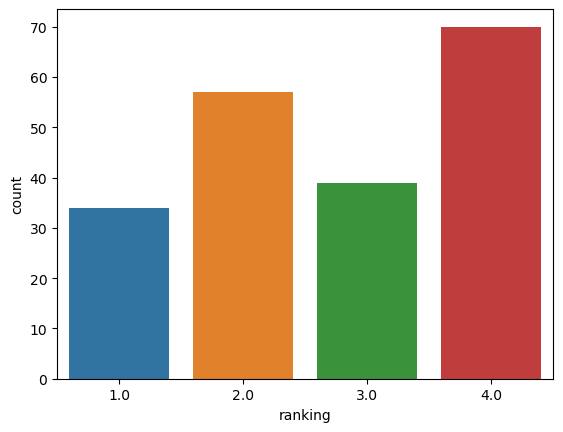

In [83]:
import seaborn as sns
sns.barplot(data = df, x = 'ranking', y = 'count')

<AxesSubplot:xlabel='ranking', ylabel='count'>

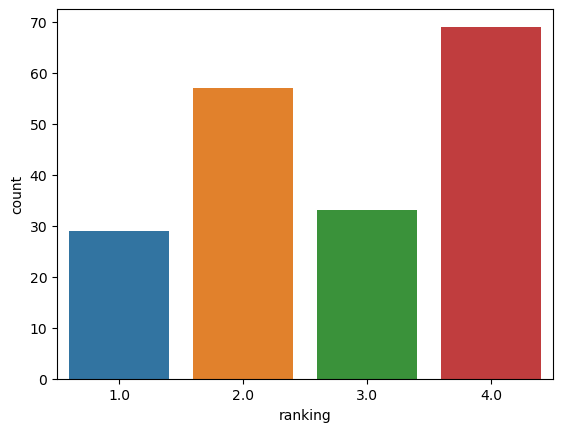

In [84]:
df = pd.DataFrame(zip(res_percentile_norm_small, [1 for _ in range(200)]), columns = ['ranking','count'])
df = df.groupby('ranking', as_index = False).agg('count')
sns.barplot(data = df, x = 'ranking', y = 'count')

#### Medium 10,000

<AxesSubplot:xlabel='ranking', ylabel='count'>

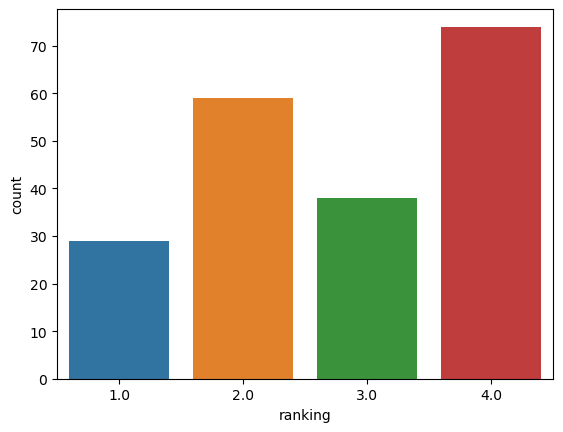

In [85]:
df = pd.DataFrame(zip(res_percentile_no_norm_med, [1 for _ in range(200)]), columns = ['ranking','count'])
df = df.groupby('ranking', as_index = False).agg('count')
sns.barplot(data = df, x = 'ranking', y = 'count')

#### Large 25,000

<AxesSubplot:xlabel='ranking', ylabel='count'>

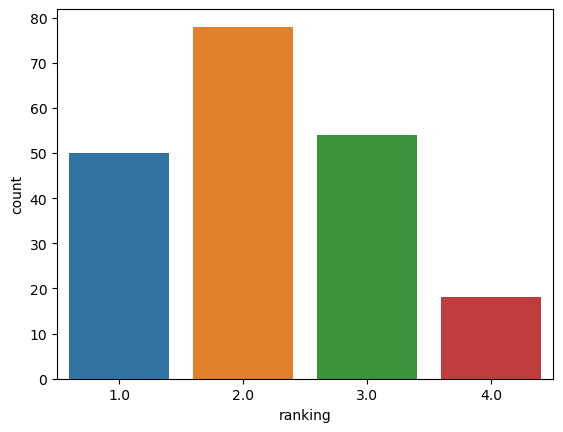

In [13]:
df = pd.DataFrame(zip(res_percentile_no_norm_large, [1 for _ in range(200)]), columns = ['ranking','count'])
df = df.groupby('ranking', as_index = False).agg('count')
sns.barplot(data = df, x = 'ranking', y = 'count')